Question 1: Use yfinance to Extract Stock Data

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object.The stock is Tesla and its ticker symbol is TSLA

In [65]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import html5lib
def make__graph(stock_data,revenue_data,stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Question 1: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TESLA.

In [44]:
tesla = yf.Ticker("TESLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time

In [45]:
tesla_data = tesla.history(period="max")

- TESLA: No data found, symbol may be delisted


Index Reseting

In [51]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [47]:
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_html_data = requests.get(tesla_url).text

In [48]:
tesla_soup = BeautifulSoup(tesla_html_data, "html.parser")


In [49]:
tesla_tables = tesla_soup.find_all('table')

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column.

In [50]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2022-06-30,16934
1,2022-03-31,18756
2,2021-12-31,17719
3,2021-09-30,13757
4,2021-06-30,11958
5,2021-03-31,10389
6,2020-12-31,10744
7,2020-09-30,8771
8,2020-06-30,6036
9,2020-03-31,5985


In [52]:
tesla_revenue.tail()

,Date,Revenue
47,2010-09-30,31
48,2010-06-30,28
49,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


Question 3: Use yfinance to Extract Stock Data

Using the Ticker function enter the ticker symbol of the stocks we want to extract data on to create a ticker objects

In [55]:

gamestop = yf.Ticker("GME")

In [57]:
gme_data = gamestop.history(period="max")

reseting index


In [58]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

In [59]:
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_html_data = requests.get(gme_url).text

Parse the html data using beautiful_soup

In [61]:
gme_soup = BeautifulSoup(gme_html_data, "html.parser")

In [62]:

gme_tables = gme_soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

In [63]:
gme_revenue.tail()

,Date,Revenue
49,2010-01-31,3524
50,2009-10-31,1835
51,2009-07-31,1739
52,2009-04-30,1981
53,2009-01-31,3492



Question 5: Plot Tesla Stock Graph

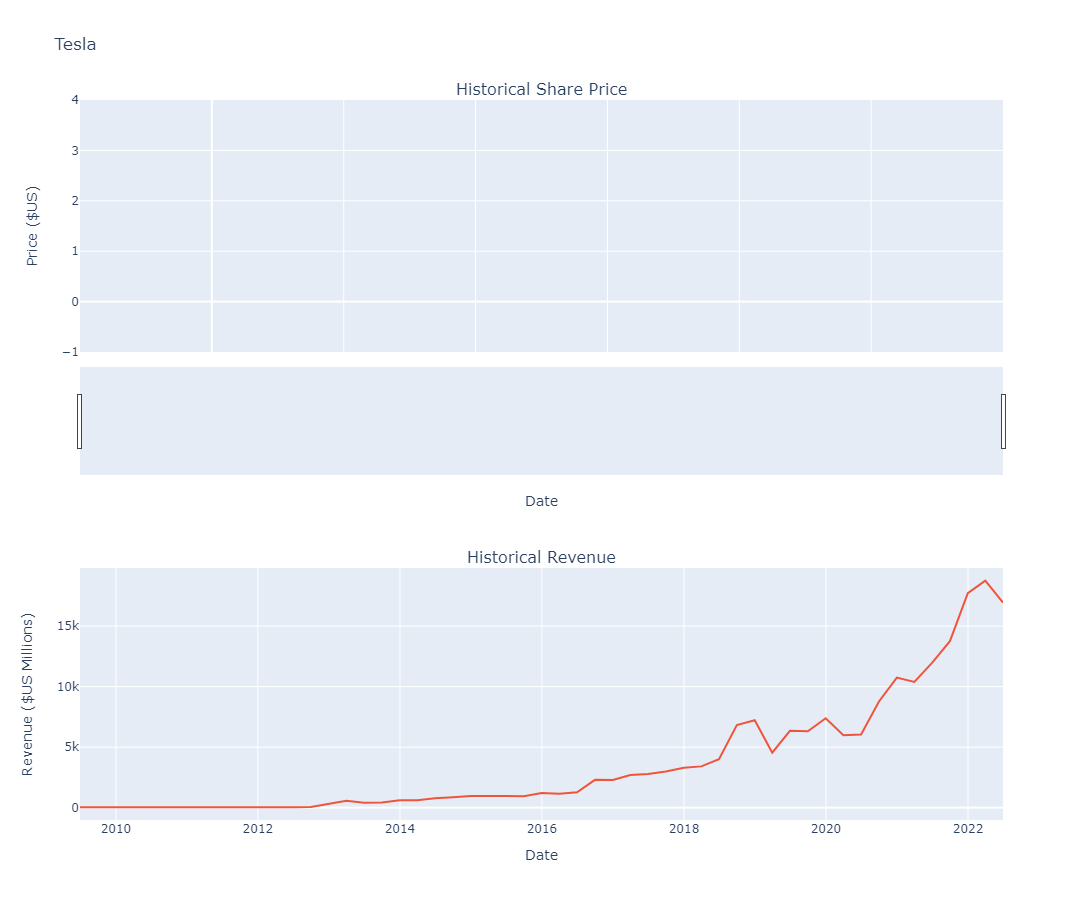

In [69]:
make__graph(tesla_data, tesla_revenue,'Tesla')


Question 6: Plot GameStop Stock Graph

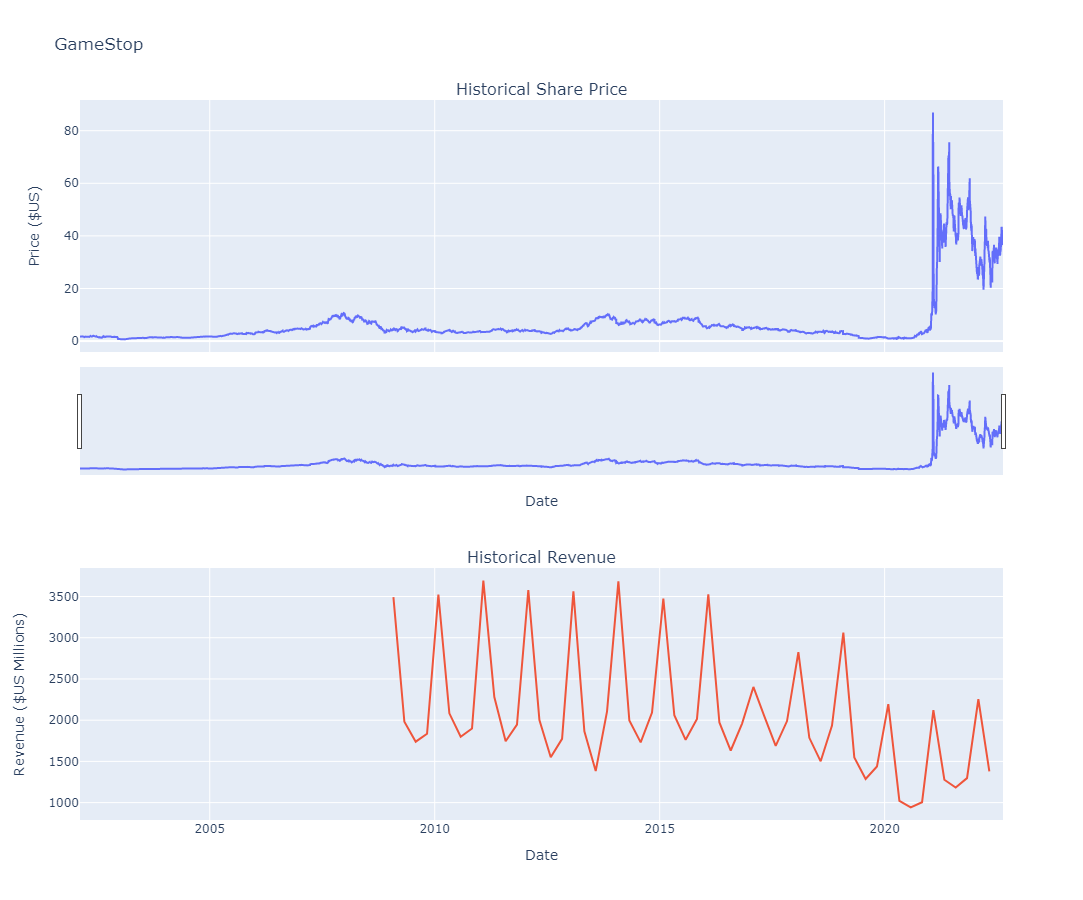

In [68]:
make__graph(gme_data, gme_revenue, 'GameStop')